# Preliminary EDA on ZRI Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as sc

In [3]:
zri = pd.read_csv('Zip_Zri_AllHomesPlusMultifamily.csv')

In [4]:
zri.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,...,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,...,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,...,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,...,1765.0,1755.0,1751.0,1752.0,1754.0,1759.0,1764.0,1769.0,1776.0,1778.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,1922.0,1925.0,1921.0,...,2245.0,2289.0,2332.0,2372.0,2398.0,2412.0,2348.0,2356.0,2311.0,NaN


In [24]:
Boken = zri.loc[zri['City'] == 'Hoboken'].iloc[:,7:].T.reset_index()

In [25]:
Boken.rename(columns = {63:'ZRI'}, inplace = True)

In [56]:
Boken.loc[:,'delta'] = Boken['ZRI'].diff(1)
Boken.loc[:,'log_delta'] = Boken['ZRI'].apply(lambda x: np.log(x)).diff(1)

In [57]:
Boken.head()

,index,ZRI,delta,log_delta
0,2010-09,2217.0,NaN,NaN
1,2010-10,2256.0,39.0,0.017438
2,2010-11,2289.0,33.0,0.014522
3,2010-12,2313.0,24.0,0.010430
4,2011-01,2327.0,14.0,0.006035


In [60]:
fig = px.line(data_frame = , x = 'index',y = 'ZRI')
fig.show()

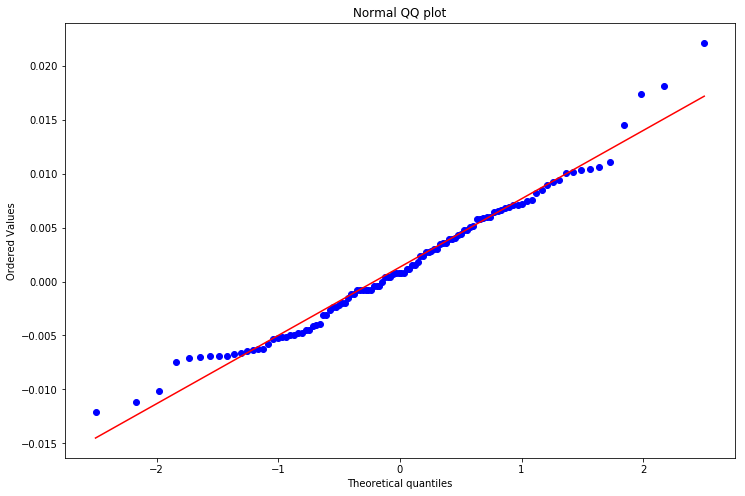

In [59]:
fig,ax = plt.subplots(figsize = (12,8))
ax.set_size_inches = (30,30)
sc.probplot(x= list(Boken['log_delta'])[1:], dist='norm', fit=True, plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [22]:
Boken.loc[:,'ZRI'] = Boken['ZRI'].apply(lambda x: np.log(x))

In [98]:
gas = pd.read_csv('../U.S._Regular_All_Formulations_Retail_Gasoline_Prices.csv')

In [99]:
gas.head()

,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
0,Aug-21,3.158
1,Jul-21,3.136
2,Jun-21,3.064
3,May-21,2.985
4,Apr-21,2.858


In [106]:
gas = gas.reset_index()

In [107]:
fig = px.line(data_frame = gas.sort_values(by = 'index', ascending = False), x = 'Month',y = 'U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon')
fig.show()